In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("penguins.csv")

In [ ]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


# Первичное статистическое исследование количественных (минимальный, максимальный значения столбцов, медиана и т.п.) и категориальных признаков.

## Все признаки:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


1. Общая информация  
- Набор данных содержит 344 строки ( записи ) и 7 столбцов ( признаков ).

2. Столбцы и их типы данных:
- species:
    *   Количество ненулевых значений: 344 ( все строки заполнены ).
    *   Категориальный признак, указывающий вид пингвина ( Adelie, Gentoo, Chinstrap )
- island:
    *   Количество ненулевых значений: 344 ( все строки заполнены ).
    *   Категориальный признак, указывающий остров, на котором обитает пингвин ( Torgersen, Biscoe, Dream ).
- bill_length_mm:
    *   Количество ненулевых значений: 342 ( 2 пропущенных значения ).
    *   Числовой признак, длина клюва пингвина в миллиметрах.
- bill_depth_mm:
    *   Количество ненулевых значений: 342 ( 2 пропущенных значения ).
    *   Числовой признак, глубина клюва пингвина в миллиметрах.
- flipper_length_mm:
    *   Количество ненулевых значений: 342 ( 2 пропущенных значения ).
    *   Числовой признак, длина ласты пингвина в миллиметрах.
- body_mass_g:
    *   Количество ненулевых значений: 342 ( 2 пропущенных значения ).
    *   Числовой признак, масса тела пингвина в граммах.
- sex:
    *   Количество ненулевых значений: 333 ( 11 пропущенных значений ).
    *   Категориальный признак, пол пингвина (  male, female ).

## Количественные признаки:

In [ ]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Разброс данных:
- Наибольший разброс наблюдается в массе тела ( body_mass_g ) и длине ласт ( flipper_length_mm ), что видно по высоким значениям стандартного отклонения.
- Наименьший разброс — в глубине клюва ( bill_depth_mm ).

Распределение:
- Медианы близки к средним значениям, что может указывать на симметричное распределение данных.

## Категориальные признаки:

In [ ]:
data.describe(include=['O'])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


Распределение видов пингвинов:
- Вид Adelie является самым распространённым ( 152 из 344 записей ).
- Виды Gentoo и Chinstrap встречаются реже.

Распределение островов:
- Остров Biscoe является самым популярным ( 168 из 344 записей ).
- Острова Torgersen и Dream встречаются реже.

Распределение пола:
- Пол male встречается чаще ( 168 из 333 записей ).
- Пол female встречается реже.
- Есть 11 пропущенных значений в столбце sex.

# Определите наличие пропусков в данных. Предложите способы заполнения пропусков, но пока не заполняйте.

In [ ]:
data.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


Количественные - заполнить медианой

Категориальные - заполнить с помощью knn

# Для каждого признака подберите лучший способ визуализации распределения значений.

In [ ]:
nums_columns = data.select_dtypes(include="float").columns
categorical_columns = data.select_dtypes(include="object").columns

## Числовые признаки:

### По видам пингвинов

#### Adelie

In [ ]:
data_adelie = data[data['species'] == 'Adelie']

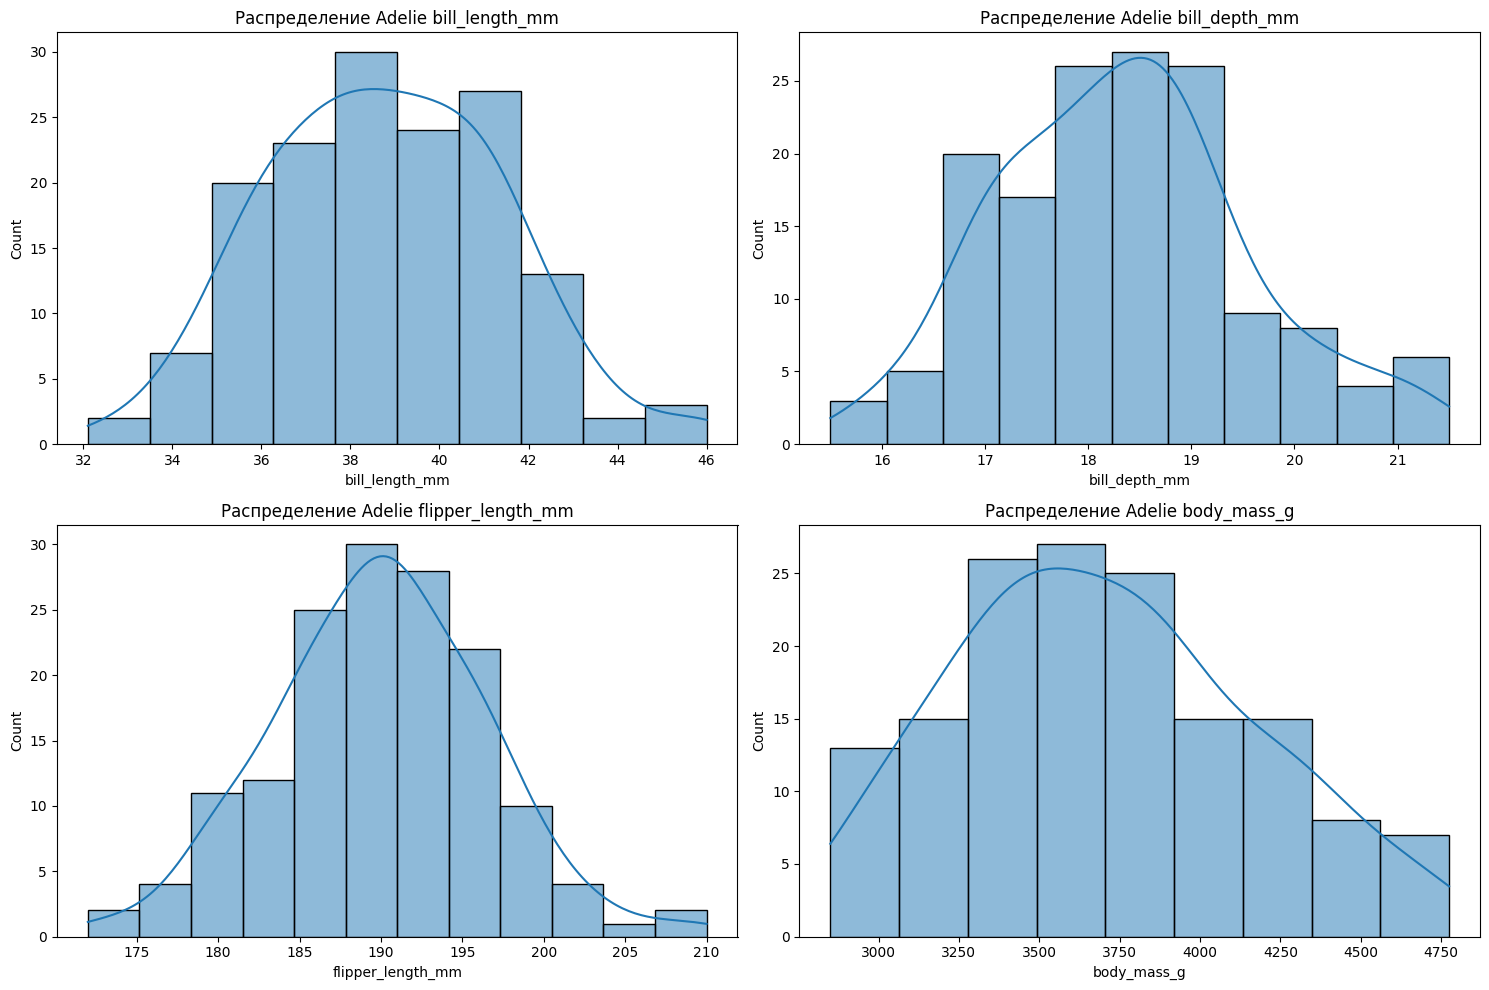

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_adelie[column], kde=True)
    plt.title(f'Распределение Adelie {column}')
plt.tight_layout()
plt.show()

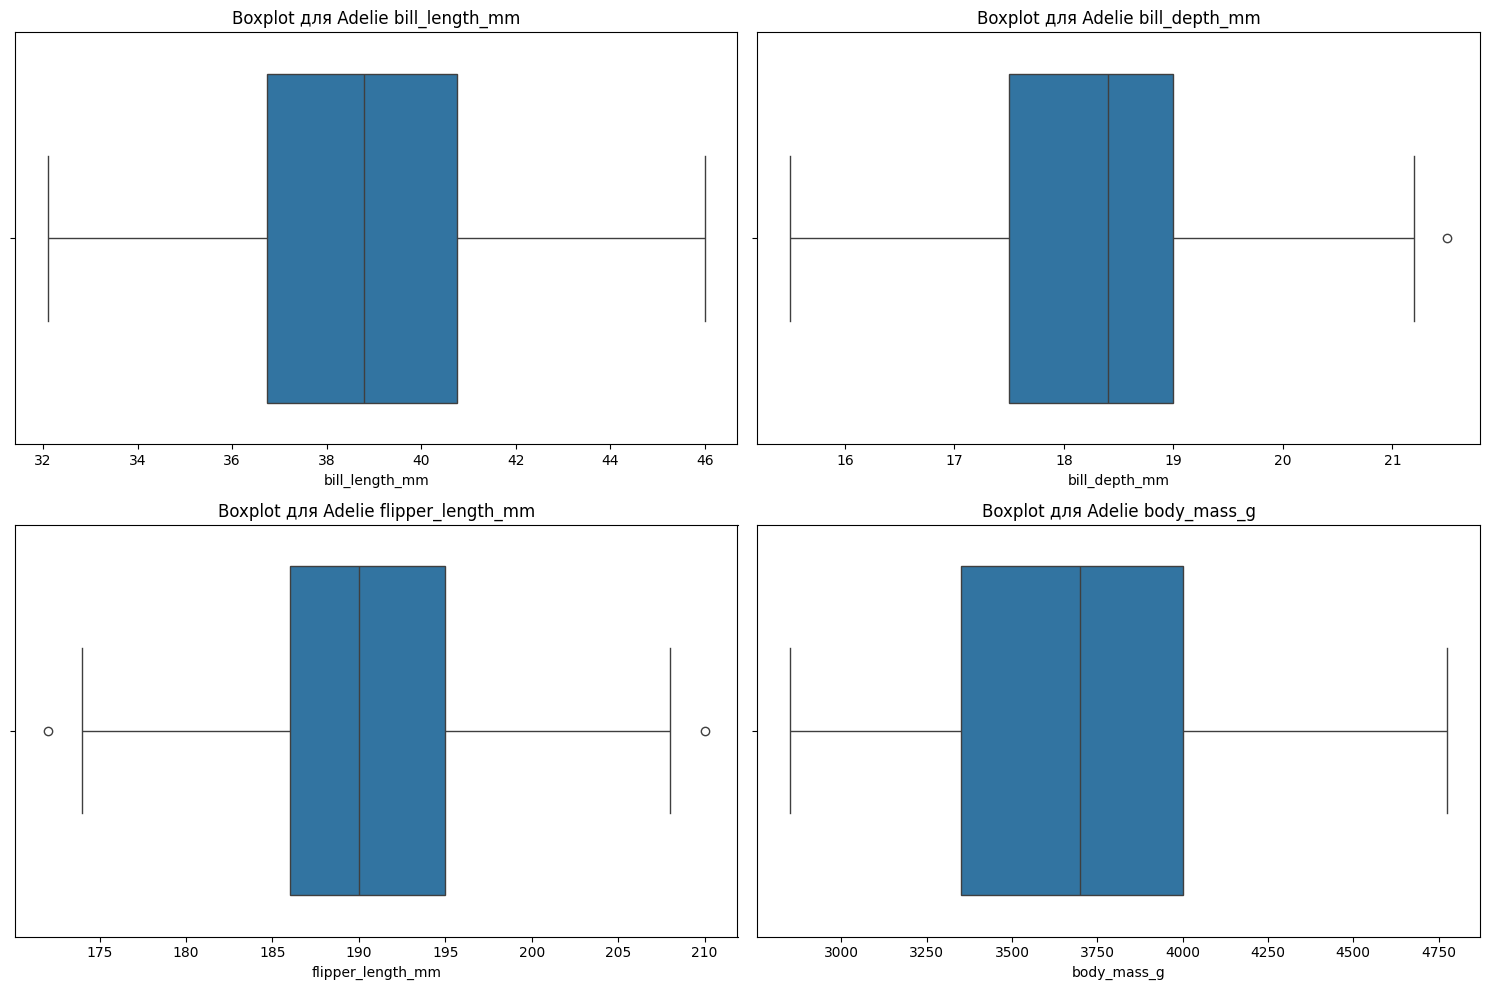

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_adelie[column])
    plt.title(f'Boxplot для Adelie {column}')
plt.tight_layout()
plt.show()

Все числовые признаки имеют нормальное распределение или близкое к нормальному, так как значения сосредоточены вокруг среднего с постепенным уменьшением частоты к краям.

Средние значения признаков:
- Длина клюва у большинства пингвинов Adelie около 38-39 мм.
- Глубина клюва у большинства пингвинов Adelie около 18-19 мм.
- Длина ласт у большинства пингвинов Adelie около 187-190 мм.
- Масса тела у большинства пингвинов Adelie около 3500-3750 г.

Разброс значений:
- Наибольший разброс наблюдается в длине ласт ( flipper_length_mm ) и массе тела ( body_mass_g ).
- Наименьший разброс — в глубине клюва ( bill_depth_mm ).

На графиках нет явных выбросов.

##### \+ Пол

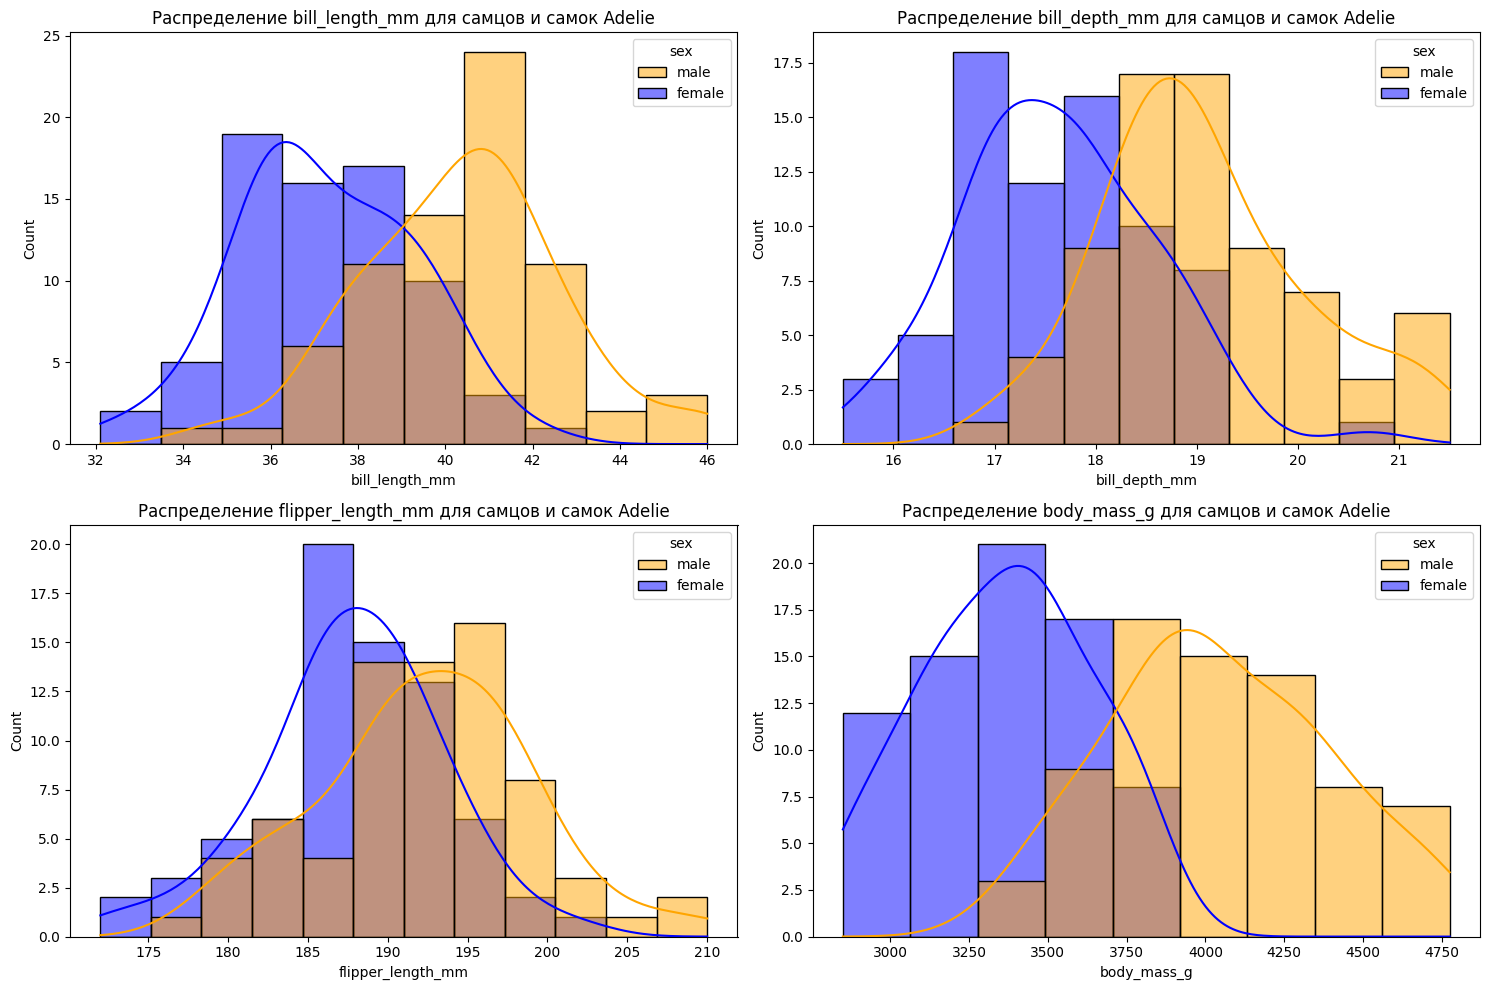

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data_adelie, x=column, hue='sex', kde=True, palette={'female': 'blue', 'male': 'orange'})
    plt.title(f'Распределение {column} для самцов и самок Adelie')
plt.tight_layout()
plt.show()

По графикам видно, что самцы в целом крупнее самок.

#### Gentoo

In [ ]:
data_gentoo = data[data['species'] == 'Gentoo']

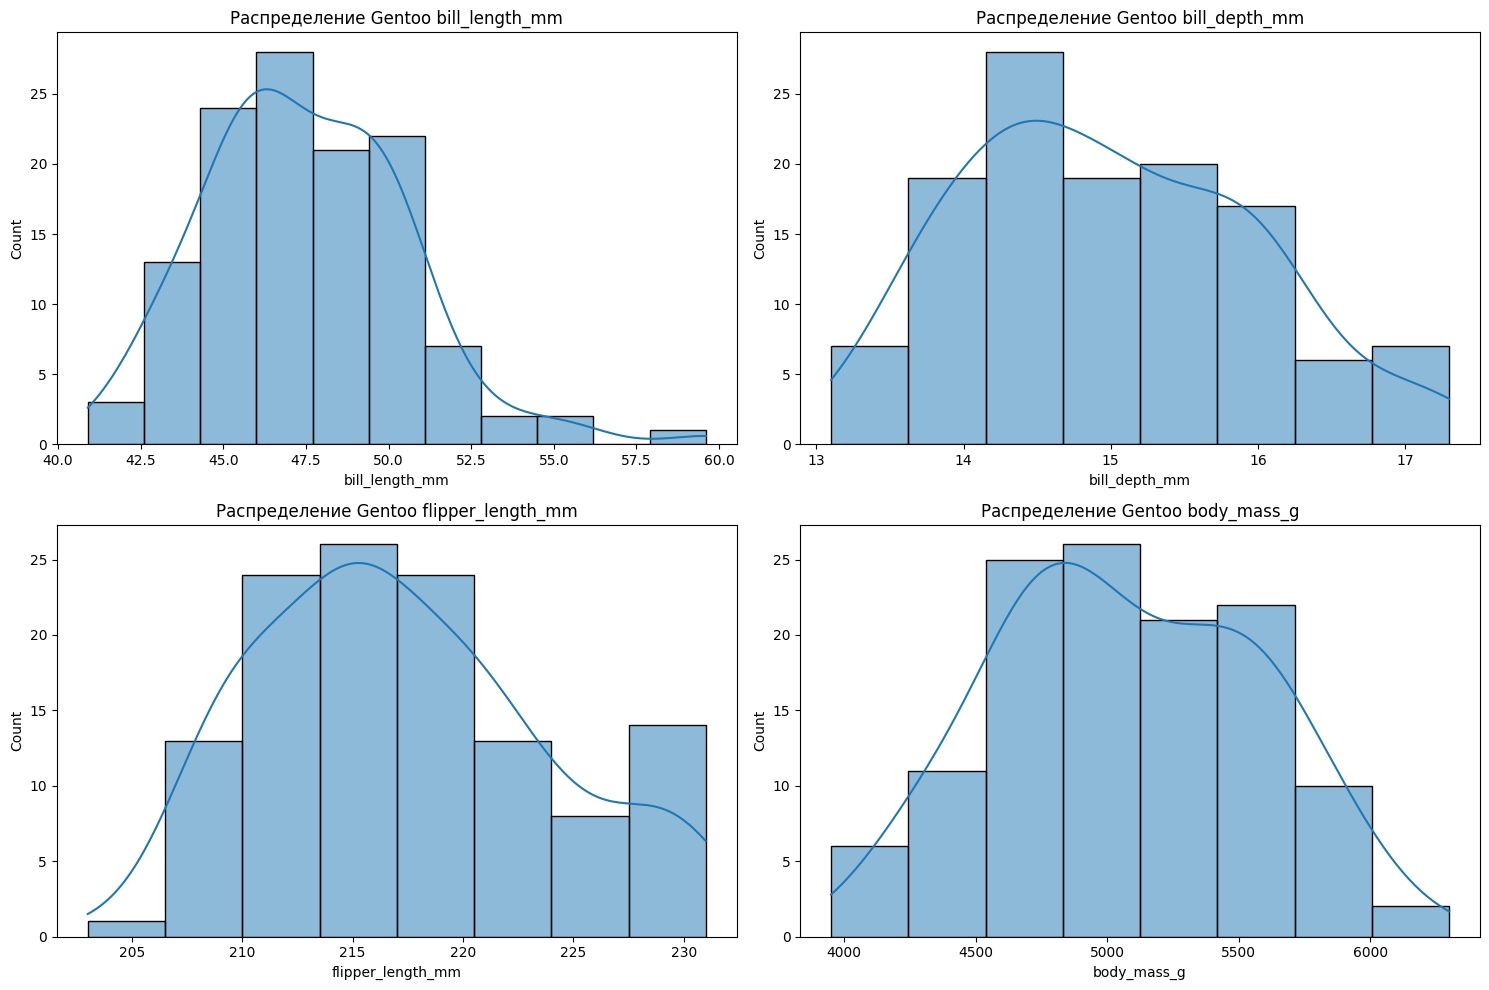

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_gentoo[column], kde=True)
    plt.title(f'Распределение Gentoo {column}')
plt.tight_layout()
plt.show()

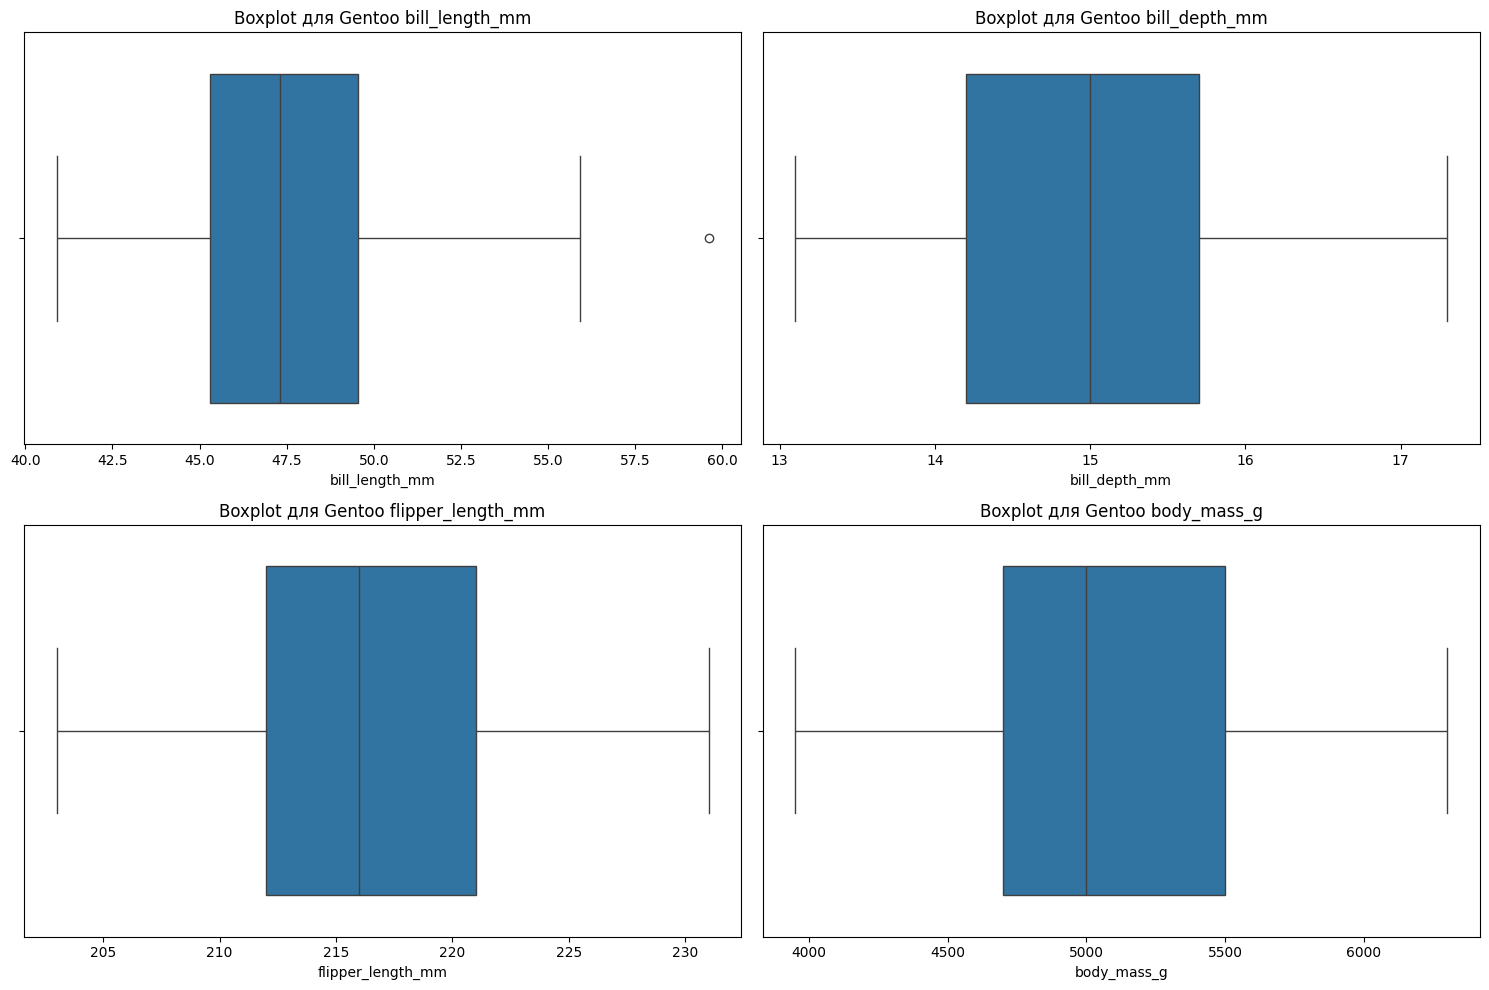

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_gentoo[column])
    plt.title(f'Boxplot для Gentoo {column}')
plt.tight_layout()
plt.show()

Все числовые признаки имеют нормальное распределение или близкое к нормальному, так как значения сосредоточены вокруг среднего с постепенным уменьшением частоты к краям.

Средние значения признаков:
- Длина клюва у большинства пингвинов Gentoo около 45-47.5 мм.
- Глубина клюва у большинства пингвинов Gentoo около 14-15 мм.
- Длина ласт у большинства пингвинов Gentoo около 210-220 мм.
- Масса тела у большинства пингвинов Gentoo около 4500-5000 г.

Разброс значений:
- Наибольший разброс наблюдается в массе тела ( body_mass_g ).
- Наименьший разброс — в длине ласт ( flipper_length_mm ).

На графиках нет явных выбросов.

##### \+ Пол

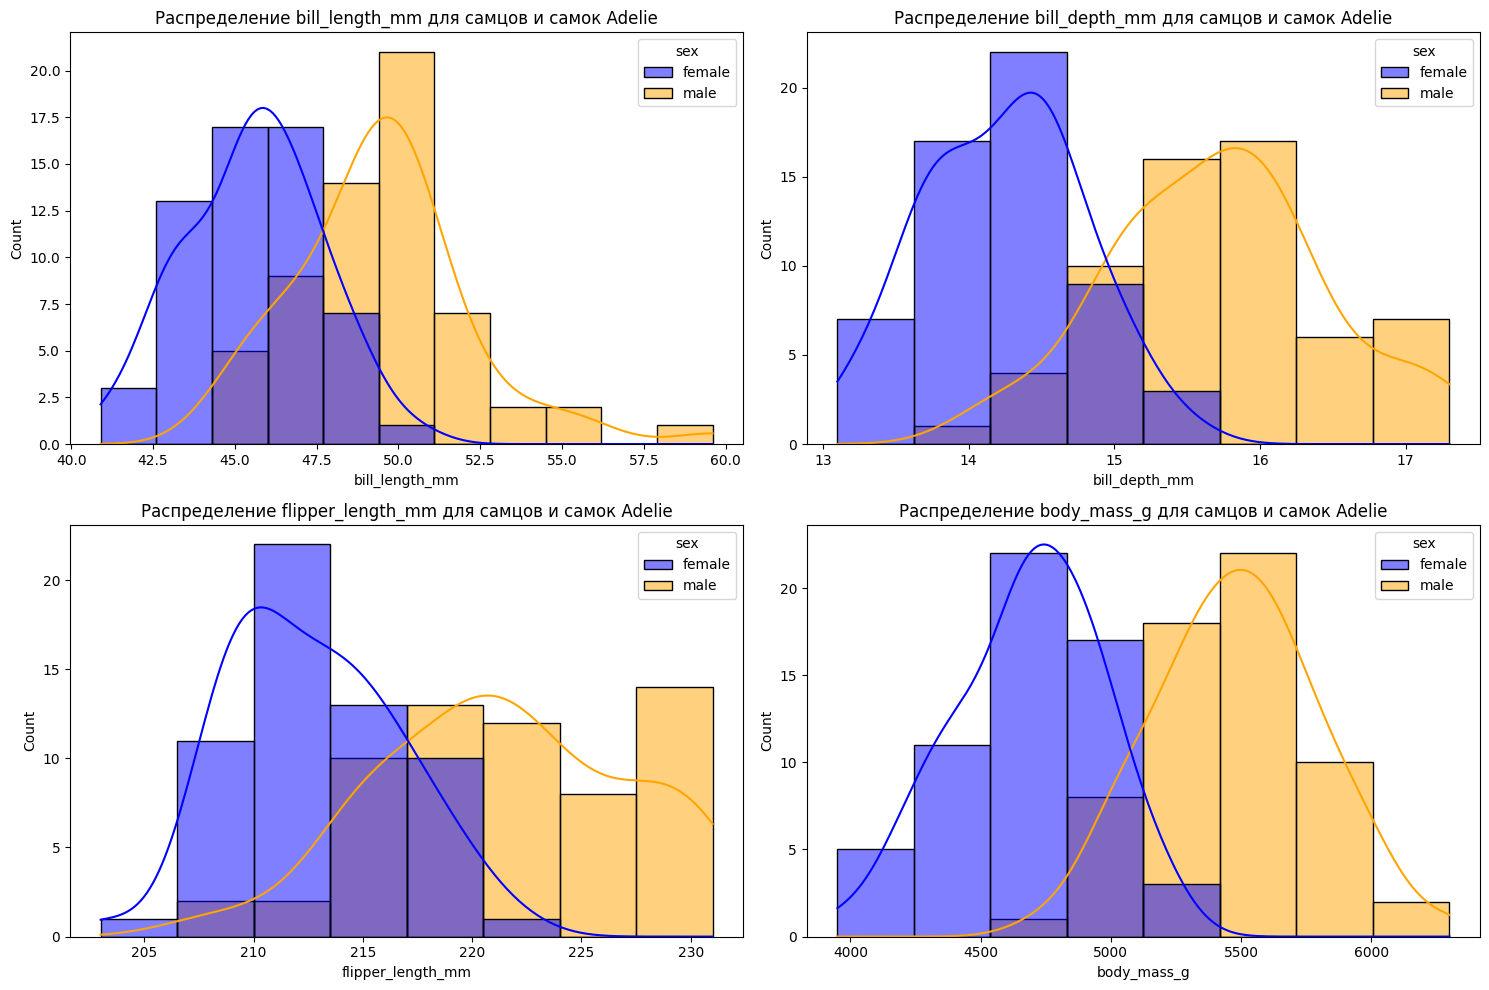

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data_gentoo, x=column, hue='sex', kde=True, palette={'female': 'blue', 'male': 'orange'})
    plt.title(f'Распределение {column} для самцов и самок Adelie')
plt.tight_layout()
plt.show()

По графикам видно, что самцы в целом крупнее самок.

#### Chinstrap

In [ ]:
data_chinstrap = data[data['species'] == 'Chinstrap']

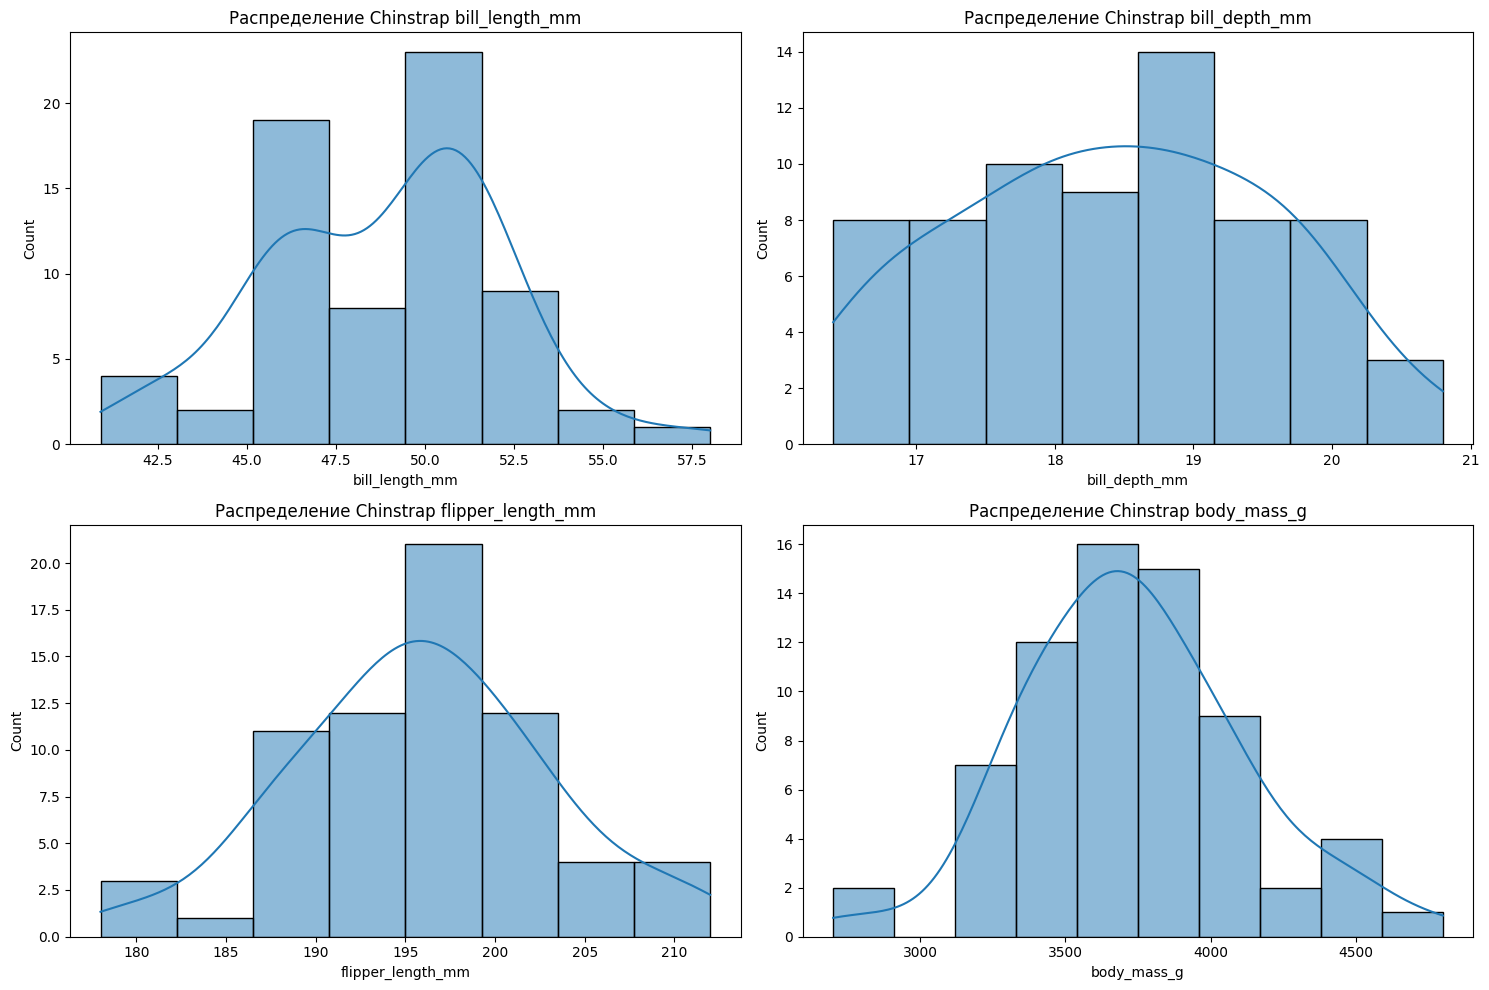

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_chinstrap[column], kde=True)
    plt.title(f'Распределение Chinstrap {column}')
plt.tight_layout()
plt.show()

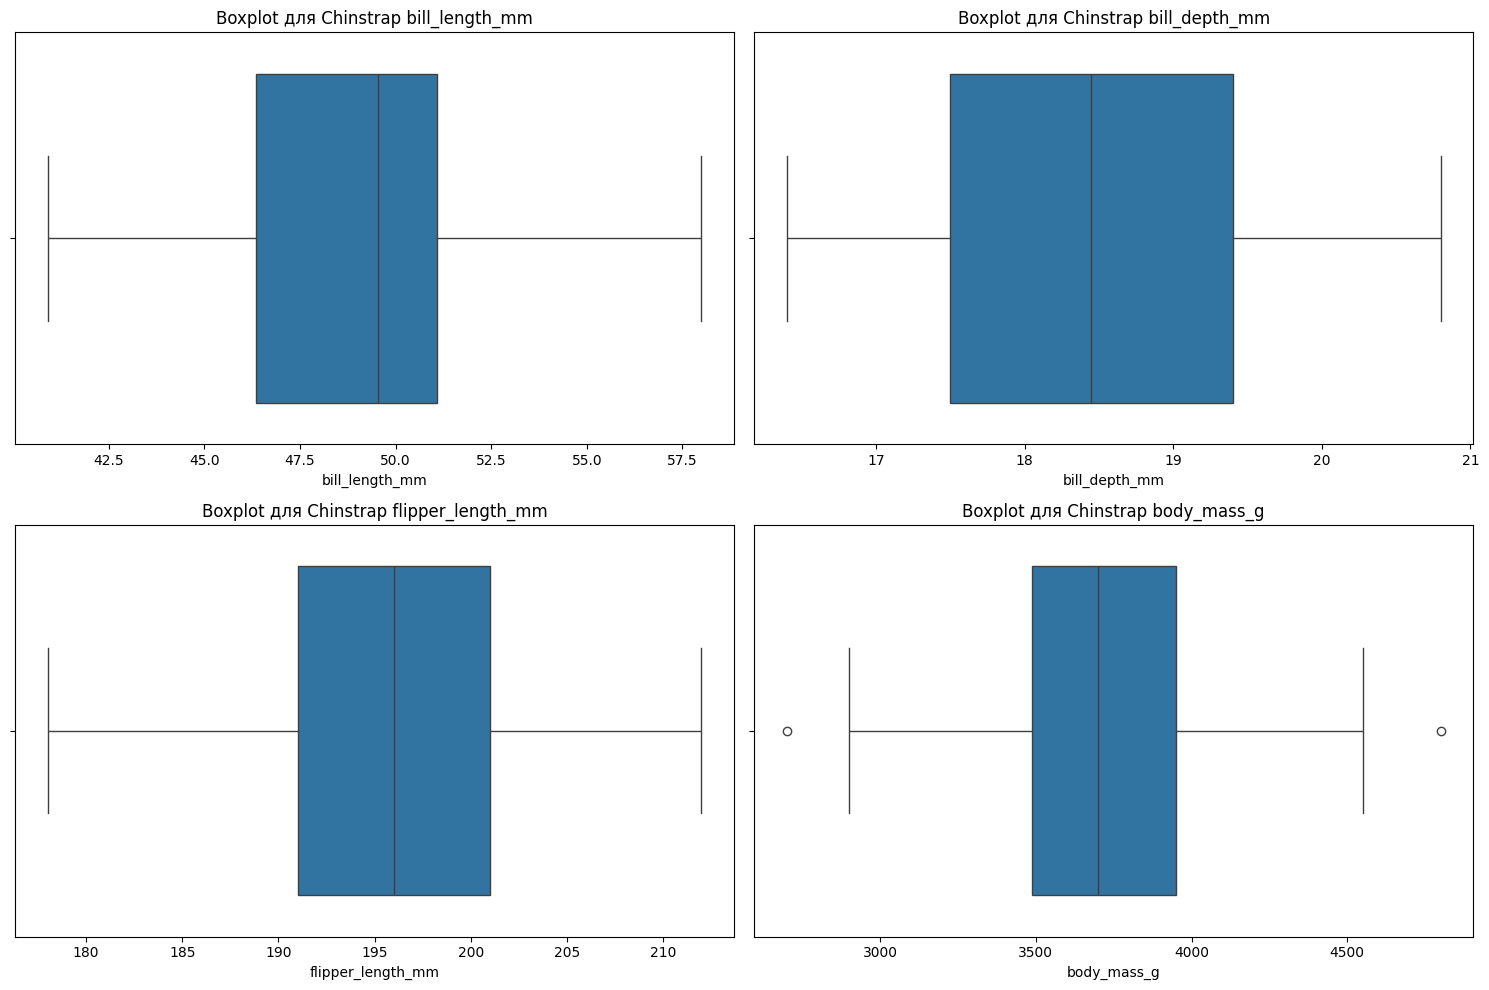

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_chinstrap[column])
    plt.title(f'Boxplot для Chinstrap {column}')
plt.tight_layout()
plt.show()

Все числовые признаки имеют распределение близкое к нормальному, так как значения сосредоточены вокруг среднего с постепенным уменьшением частоты к краям.

Средние значения признаков:
- Длина клюва у большинства пингвинов Chinstrap около 50-52 мм.
- Глубина клюва у большинства пингвинов Chinstrap около 18-19.5 мм.
- Длина ласт у большинства пингвинов Chinstrap около 190-201 мм.
- Масса тела у большинства пингвинов Chinstrap около 3500-4000 г.

Разброс значений:
- Наибольший разброс наблюдается в длине клюва ( bill_length_mm ) и длине ласт ( flipper_length_mm ).
- Наименьший разброс — в глубине клюва ( bill_depth_mm ).
На графиках нет явных выбросов.

##### \+ Пол

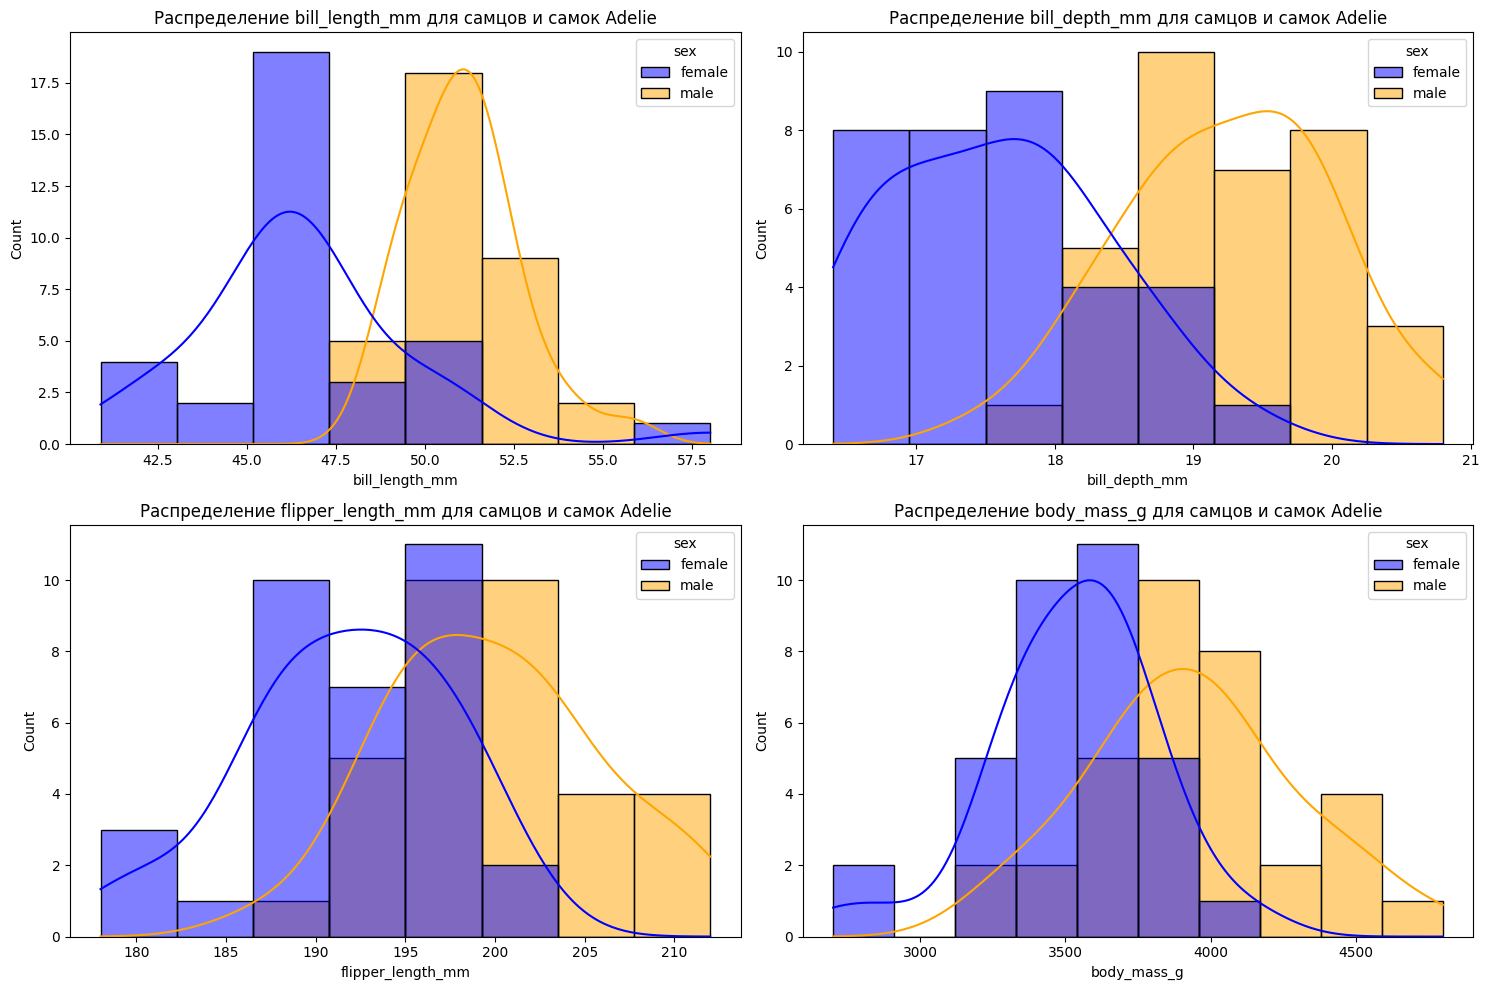

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(nums_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data_chinstrap, x=column, hue='sex', kde=True, palette={'female': 'blue', 'male': 'orange'})
    plt.title(f'Распределение {column} для самцов и самок Adelie')
plt.tight_layout()
plt.show()

По графикам видно, что самцы в целом крупнее самок.

#### Вывод:
- Самыми крупными по весу пингвинами являются Gentoo, самыми маленькими - Adelie
- Самый длинный клюв у Chinstrap
- По глубине клювы у Adelie и Chinstrap примерно одинаковые
- Самцы в среднем всегда крупнее самок

## Столбчатая диаграмма для категориальных признаков

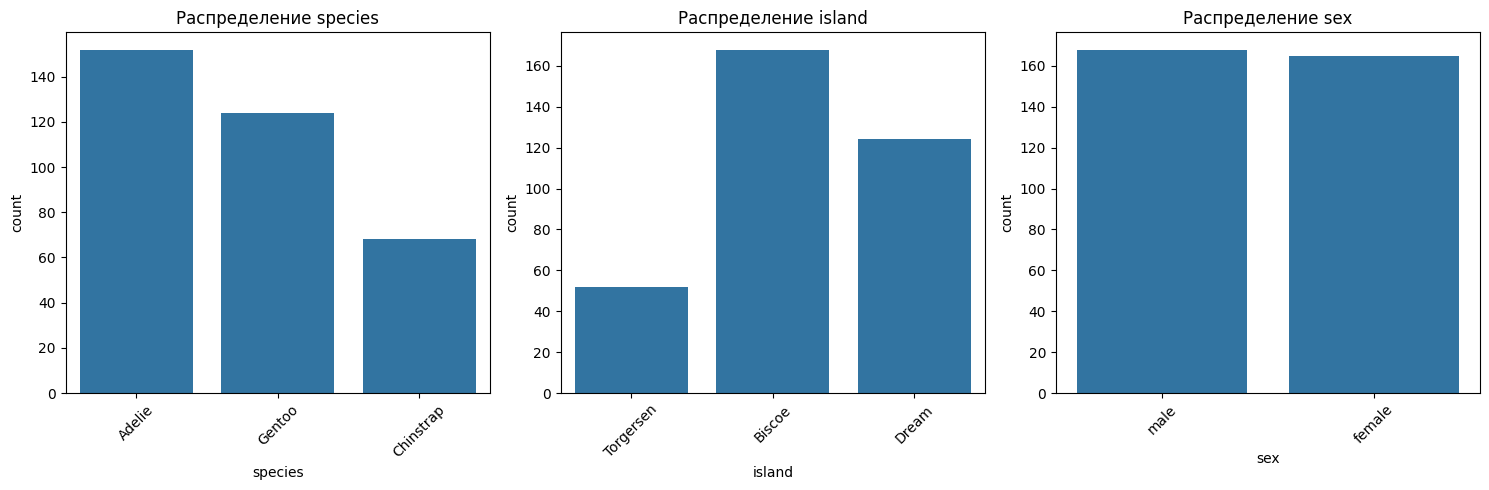

In [ ]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=data[column])
    plt.title(f'Распределение {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

По графикам заметим, что Adelie - самый распространенный вид пингвинов, а самый редкий - Chinstrap.

Больше всего пингвинов на острове Biscoe, а меньше всего на Torgersen.

Самцов и самок примерно одинаковое количество.

# Проверьте наличие отклонений и аномалий в распределении признаков.

По диаграммам заметим, что аномалий в данных нет.

По графикам заметим:

Длина клюва ( bill_length_mm ): Распределение близко к нормальному, но есть несколько выбросов в верхней части ( значения выше 55 мм ).

Глубина клюва ( bill_depth_mm ): Распределение также близко к нормальному, но есть небольшой хвост в верхней части.

Длина плавника ( flipper_length_mm ): Распределение имеет небольшой перекос вправо, с выбросами в верхней части ( значения выше 220 мм ).

Масса тела ( body_mass_g ): Распределение имеет перекос вправо, с выбросами в верхней части ( значения выше 6000 г ).

Вероятнее всего все полученные выбросы являются значениями более крупных видов.

# Предположите наличие зависимостей в признаках. С помощью визуализации подтвердите или опровергните их наличие.

## Предположения:

1. Чем длинне ласты, тем больше масса тела.
2. У крупных пингвинов клюв длиннее.
3. Разные виды пингвинов имеют разные характеристики тела.

Text(0.5, 1.02, 'Матрица диаграмм рассеяния (Pairplot)')

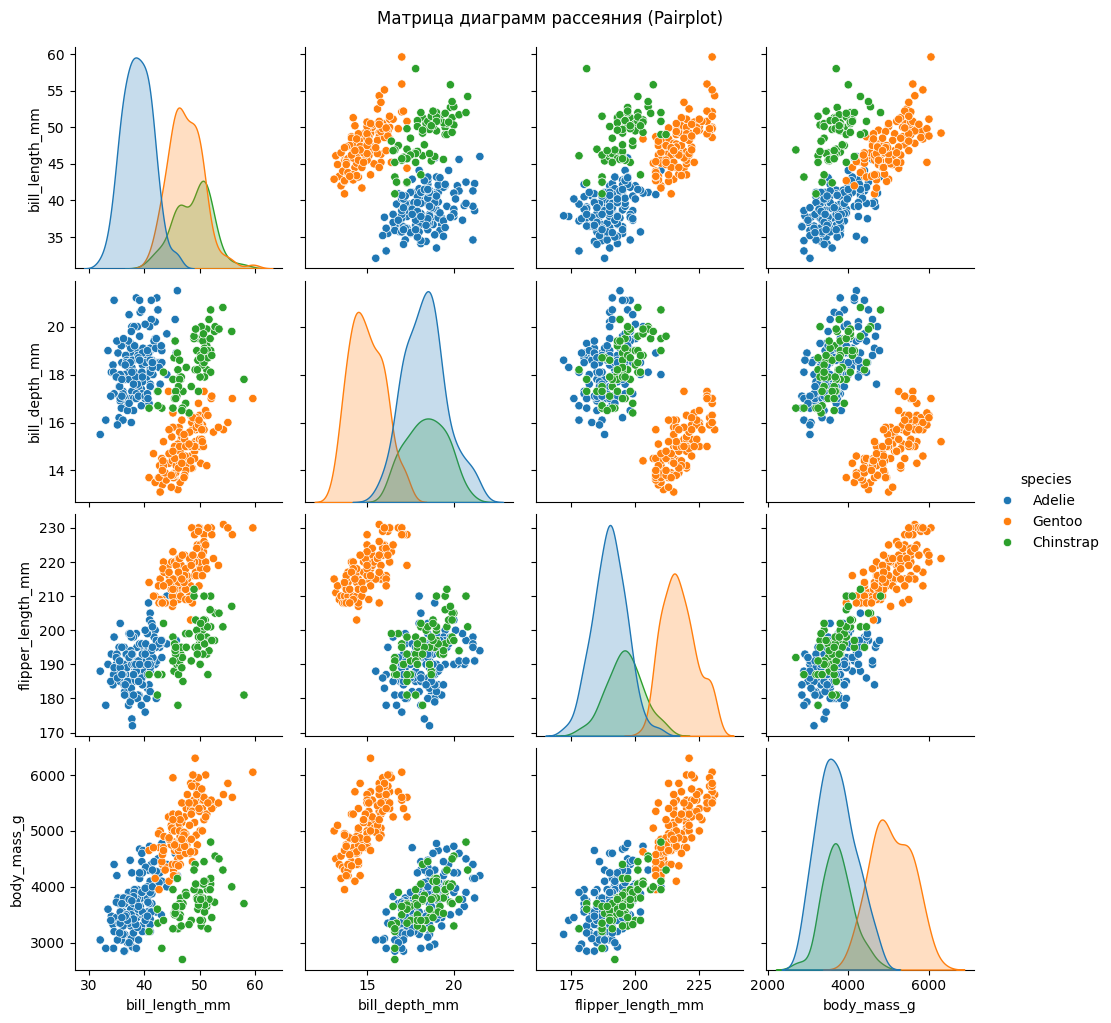

In [ ]:
# Матрица диаграмм рассеяния (pairplot) для всех количественных признаков
sns.pairplot(data, hue='species', diag_kind='kde').fig.suptitle(
    'Матрица диаграмм рассеяния (Pairplot)', y=1.02
)

## Выводы:

1. Чем длиннее ласты, тем больше масса тела – подтверждается.

На диаграммах рассеяния между flipper_length_mm и body_mass_g наблюдается выраженная положительная зависимость.
Особенно заметно это у вида Gentoo, который имеет самые длинные ласты и самую большую массу тела.

2. У крупных пингвинов клюв длиннее – частично подтверждается.

В общем случае у более массивных пингвинов длина клюва больше.
Однако зависимость менее выражена по сравнению с длиной ласт.
Исключение: Chinstrap имеет длинный клюв, но его масса меньше, чем у Gentoo.

3. Разные виды пингвинов имеют разные характеристики тела – подтверждается.

Виды хорошо разделяются по параметрам ( bill_length_mm, flipper_length_mm, body_mass_g ).
Gentoo выделяется самой большой массой и длинными ластами.
Chinstrap имеет самый длинный, но узкий клюв.
Adelie обладает наименьшими размерами тела и относительно коротким, но глубоким клювом.

# Постройте «тепловую карту» зависимости признаков.

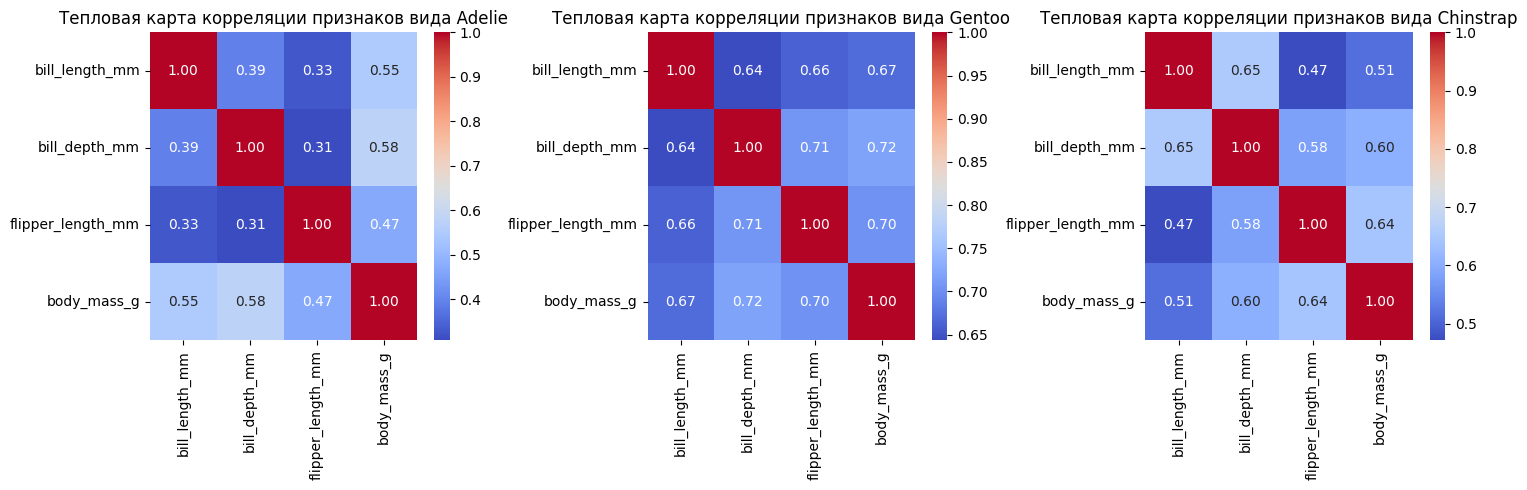

In [ ]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(data.species.unique(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(data[data.species == column].corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Тепловая карта корреляции признаков вида {column}")
plt.tight_layout()
plt.show()

0. Общий случай:

У всех видов наблюдается положительная корреляция между массой тела  и другими признаками.
Однако сила корреляции различается между видами.

1. Пингвины вида Adelie:
- Наиболее сильная связь у массы тела с глубиной клюва ( r = 0.58 ) и длиной клюва ( r = 0.55 ).
- Длина ласт ( flipper_length_mm ) менее связана с массой ( r = 0.47 ).
- Связь между длиной и глубиной клюва относительно слабая ( r = 0.39 ).

2. Пингвины вида Gentoo:
- Все признаки имеют сильную корреляцию друг с другом.
- Самая высокая связь между массой тела и глубиной клюва ( r = 0.72 ), а также длиной ласт ( r = 0.70 ).
- Длина клюва также связана с массой ( r = 0.67 ).
- В целом, у Gentoo наблюдаются самые сильные корреляции среди всех видов.

3. Пингвины вида Chinstrap:
- Корреляции средние, но масса тела наиболее связана с длиной ласт ( r = 0.64 ).
- Длина и глубина клюва умеренно связаны ( r = 0.65 ).
- В отличие от Gentoo, корреляции менее выражены, но всё же значимы.

# Сделайте предположение о возможности использования каких-либо признаков или их сочетаний для заполнения пропусков. Заполните пропуски.

Вывод всех строк с пропущенными значениями:

In [ ]:
data[data.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Заметим, что есть два пингвина, у которых не известен ни один числовой признак. Таких можно удалить

In [ ]:
cleaned_df = data.dropna(thresh=3).reset_index(drop=True)

In [ ]:
cleaned_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
338,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
339,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
340,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [ ]:
cleaned_df[cleaned_df.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
8,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
9,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
10,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
46,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
177,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
217,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
255,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
267,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


После очистки, пропусков в числовых признаков нет. Пропуски только в категориальном признаке sex.

Для категориальных признаков

In [ ]:
data_enc = cleaned_df.copy()

In [ ]:
data_enc

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
338,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
339,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
340,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


Преобразование категориальных признаков species и island в числовые:

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data_enc[['species', 'island']])

In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['species', 'island']))

In [ ]:
data_encoded = pd.concat([data_enc.reset_index(drop=True), encoded_df], axis=1)
data_encoded = data_encoded.drop(['species', 'island'], axis=1)

In [ ]:
data_encoded

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,male,1.0,0.0,0.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,female,1.0,0.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,female,1.0,0.0,0.0,0.0,0.0,1.0
3,36.7,19.3,193.0,3450.0,female,1.0,0.0,0.0,0.0,0.0,1.0
4,39.3,20.6,190.0,3650.0,male,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
337,55.8,19.8,207.0,4000.0,male,0.0,1.0,0.0,0.0,1.0,0.0
338,43.5,18.1,202.0,3400.0,female,0.0,1.0,0.0,0.0,1.0,0.0
339,49.6,18.2,193.0,3775.0,male,0.0,1.0,0.0,0.0,1.0,0.0
340,50.8,19.0,210.0,4100.0,male,0.0,1.0,0.0,0.0,1.0,0.0


Для категориального признака sex можно использовать knn или случайный лес

In [ ]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen']

## KNN

In [ ]:
data_knn = data_encoded.copy()

Кодирование признака sex ( можно использовать LabelEncoder, так как sex принимает всего 2 значения )

In [ ]:
sex_encoder = LabelEncoder()
data_knn["sex_knn"] = np.nan
mask_known_sex = data_knn["sex"].notna()
data_knn.loc[mask_known_sex, "sex_knn"] = sex_encoder.fit_transform(data_knn.loc[mask_known_sex, "sex"])

In [ ]:
data_knn_1 = data_knn.copy()

In [ ]:
data_knn_1

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_knn
0,39.1,18.7,181.0,3750.0,male,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,39.5,17.4,186.0,3800.0,female,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,female,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.7,19.3,193.0,3450.0,female,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,39.3,20.6,190.0,3650.0,male,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
337,55.8,19.8,207.0,4000.0,male,0.0,1.0,0.0,0.0,1.0,0.0,1.0
338,43.5,18.1,202.0,3400.0,female,0.0,1.0,0.0,0.0,1.0,0.0,0.0
339,49.6,18.2,193.0,3775.0,male,0.0,1.0,0.0,0.0,1.0,0.0,1.0
340,50.8,19.0,210.0,4100.0,male,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
data_knn_1 = data_knn_1.drop(columns=["sex"])

In [ ]:
imputer = KNNImputer(n_neighbors=5)
data_filled_knn = imputer.fit_transform(data_knn_1)

In [ ]:
data_filled_knn = pd.DataFrame(data_filled_knn, columns=data_knn_1.columns)

In [ ]:
data_filled_knn

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_knn
0,39.1,18.7,181.0,3750.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.7,19.3,193.0,3450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,39.3,20.6,190.0,3650.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
337,55.8,19.8,207.0,4000.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
338,43.5,18.1,202.0,3400.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
339,49.6,18.2,193.0,3775.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
340,50.8,19.0,210.0,4100.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
data_filled_knn['sex_knn'] = data_filled_knn["sex_knn"].round().astype(int)
data_filled_knn['sex_knn'] = sex_encoder.inverse_transform(data_filled_knn['sex_knn'])

In [ ]:
data_filled_knn

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_knn
0,39.1,18.7,181.0,3750.0,1.0,0.0,0.0,0.0,0.0,1.0,male
1,39.5,17.4,186.0,3800.0,1.0,0.0,0.0,0.0,0.0,1.0,female
2,40.3,18.0,195.0,3250.0,1.0,0.0,0.0,0.0,0.0,1.0,female
3,36.7,19.3,193.0,3450.0,1.0,0.0,0.0,0.0,0.0,1.0,female
4,39.3,20.6,190.0,3650.0,1.0,0.0,0.0,0.0,0.0,1.0,male
...,...,...,...,...,...,...,...,...,...,...,...
337,55.8,19.8,207.0,4000.0,0.0,1.0,0.0,0.0,1.0,0.0,male
338,43.5,18.1,202.0,3400.0,0.0,1.0,0.0,0.0,1.0,0.0,female
339,49.6,18.2,193.0,3775.0,0.0,1.0,0.0,0.0,1.0,0.0,male
340,50.8,19.0,210.0,4100.0,0.0,1.0,0.0,0.0,1.0,0.0,male


Проверка, что все пропуски были заполнены:

In [ ]:
data_filled_knn.isna().sum()

,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
species_Adelie,0
species_Chinstrap,0
species_Gentoo,0
island_Biscoe,0
island_Dream,0
island_Torgersen,0


In [ ]:
data_filled_knn.sex_knn.describe()

,sex_knn
count,342
unique,2
top,female
freq,172


После заполнения knn девочек получилось больше, чем мальчиков.

In [ ]:
data_filled_knn["sex"] = data_encoded["sex"]

In [ ]:
data_filled_knn

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_knn,sex
0,39.1,18.7,181.0,3750.0,1.0,0.0,0.0,0.0,0.0,1.0,male,male
1,39.5,17.4,186.0,3800.0,1.0,0.0,0.0,0.0,0.0,1.0,female,female
2,40.3,18.0,195.0,3250.0,1.0,0.0,0.0,0.0,0.0,1.0,female,female
3,36.7,19.3,193.0,3450.0,1.0,0.0,0.0,0.0,0.0,1.0,female,female
4,39.3,20.6,190.0,3650.0,1.0,0.0,0.0,0.0,0.0,1.0,male,male
...,...,...,...,...,...,...,...,...,...,...,...,...
337,55.8,19.8,207.0,4000.0,0.0,1.0,0.0,0.0,1.0,0.0,male,male
338,43.5,18.1,202.0,3400.0,0.0,1.0,0.0,0.0,1.0,0.0,female,female
339,49.6,18.2,193.0,3775.0,0.0,1.0,0.0,0.0,1.0,0.0,male,male
340,50.8,19.0,210.0,4100.0,0.0,1.0,0.0,0.0,1.0,0.0,male,male


## Случайный лес

In [ ]:
data_filled_rf = data_encoded.copy()

In [ ]:
train_data_rf = data_filled_rf.dropna(subset=["sex"])
test_data_rf = data_filled_rf[data_filled_rf["sex"].isna()]

Кодирование признака sex

In [ ]:
encoder_sex = LabelEncoder()
train_data_rf["sex"] = encoder_sex.fit_transform(train_data_rf["sex"])

<ipython-input-51-e31aff4edc5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_rf["sex"] = encoder_sex.fit_transform(train_data_rf["sex"])


Обучение:

In [ ]:
X_train = train_data_rf[features]
y_train = train_data_rf["sex"]
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Предсказание sex для пропусков:

In [ ]:
predicted_sex = model.predict(test_data_rf[features])

In [ ]:
data_filled_rf["sex_rf"] = data_filled_rf["sex"]

Заполнение пропусков:

In [ ]:
data_filled_rf.loc[data_filled_rf["sex_rf"].isna(), "sex_rf"] = sex_encoder.inverse_transform(predicted_sex)

Проверка, что все пропущенные значения заполнены:

In [ ]:
data_filled_rf.isna().sum()

,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,9
species_Adelie,0
species_Chinstrap,0
species_Gentoo,0
island_Biscoe,0
island_Dream,0


In [ ]:
data_filled_rf.sex_rf.describe()

,sex_rf
count,342
unique,2
top,female
freq,173


После заполнения пропуской случайным лесом девочек больше

# Продемонстрируйте и объясните результаты заполнения пропусков.

Объединяем полученные результаты knn и случайного леса

In [ ]:
filled_data = pd.merge(
    data_filled_rf,
    data_filled_knn,
    on=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
        'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
        'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex'],
    how='inner'
)

In [ ]:
filled_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_rf,sex_knn
0,39.1,18.7,181.0,3750.0,male,1.0,0.0,0.0,0.0,0.0,1.0,male,male
1,39.5,17.4,186.0,3800.0,female,1.0,0.0,0.0,0.0,0.0,1.0,female,female
2,40.3,18.0,195.0,3250.0,female,1.0,0.0,0.0,0.0,0.0,1.0,female,female
3,36.7,19.3,193.0,3450.0,female,1.0,0.0,0.0,0.0,0.0,1.0,female,female
4,39.3,20.6,190.0,3650.0,male,1.0,0.0,0.0,0.0,0.0,1.0,male,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,55.8,19.8,207.0,4000.0,male,0.0,1.0,0.0,0.0,1.0,0.0,male,male
338,43.5,18.1,202.0,3400.0,female,0.0,1.0,0.0,0.0,1.0,0.0,female,female
339,49.6,18.2,193.0,3775.0,male,0.0,1.0,0.0,0.0,1.0,0.0,male,male
340,50.8,19.0,210.0,4100.0,male,0.0,1.0,0.0,0.0,1.0,0.0,male,male


Проверим, есть ли различия в предсказании пола:

In [ ]:
filled_data[filled_data.sex_knn != filled_data.sex_rf]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_rf,sex_knn
177,44.5,14.3,216.0,4100.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,female,male


Заметим, что одного пингвина knn и случайный лес предсказали по-разному. Это может означать, что он лежит на грани.

In [ ]:
filled_data.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex', 'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
       'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_rf',
       'sex_knn'],
      dtype='object')

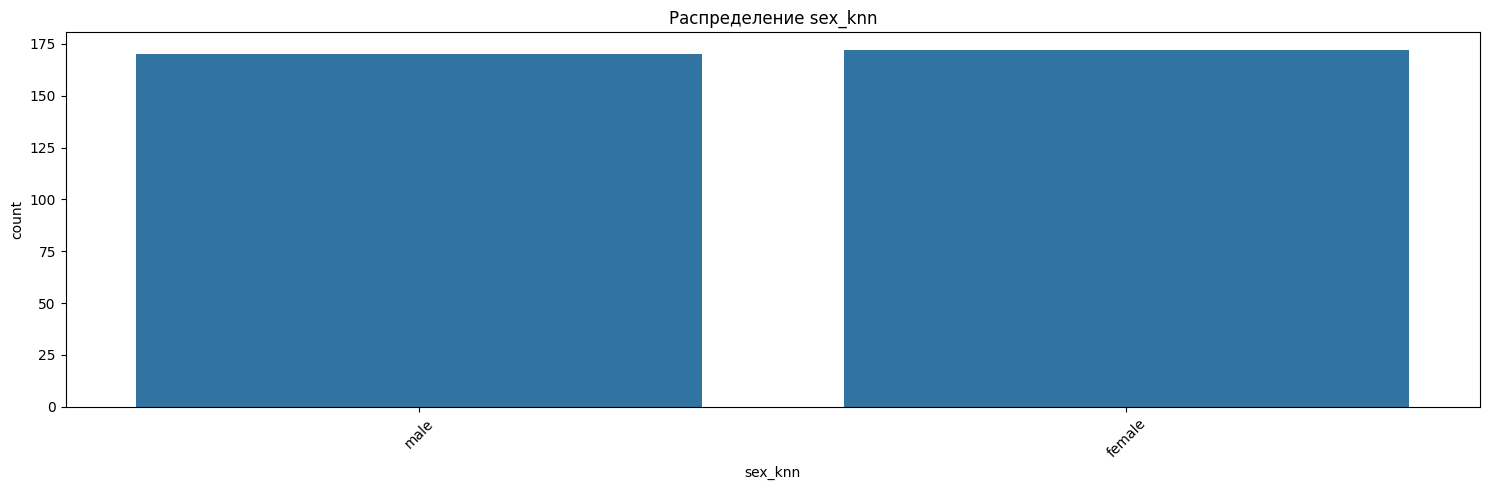

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x=filled_data['sex_knn'])
plt.title(f'Распределение sex_knn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

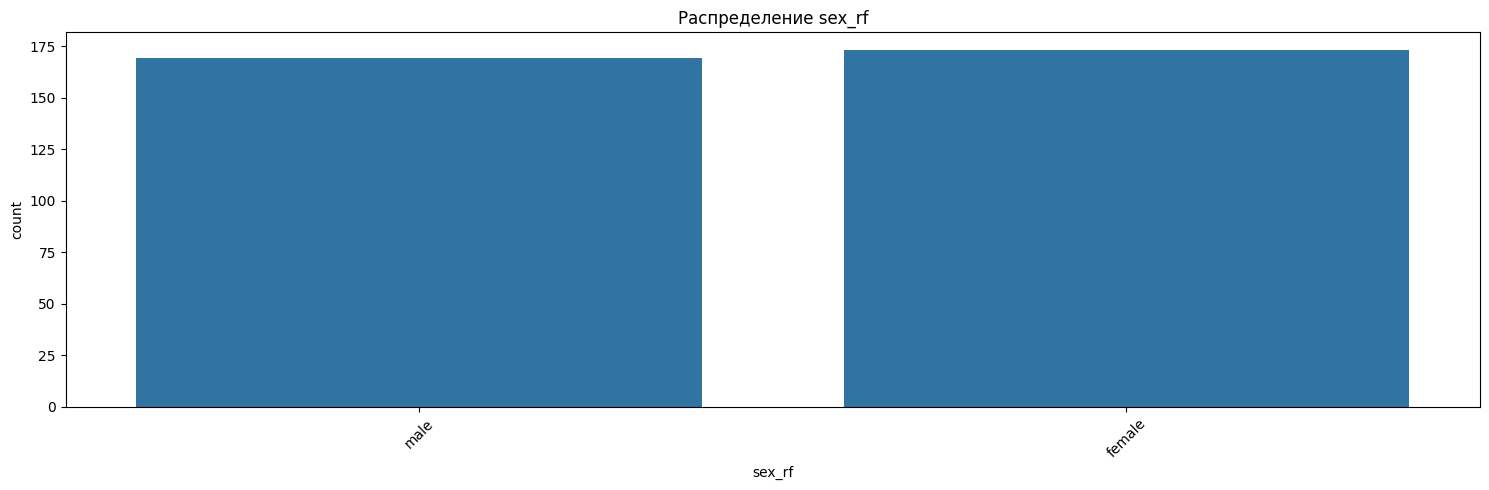

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x=filled_data['sex_rf'])
plt.title(f'Распределение sex_rf')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Примените нормализацию. Визуализируйте результат нормализации на примере одного-двух признаков.

In [ ]:
standart_data = filled_data.copy()

In [ ]:
scaler = StandardScaler()
standart_data[nums_columns] = scaler.fit_transform(standart_data[nums_columns])
standart_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_rf,sex_knn
0,-0.884499,0.785449,-1.418347,-0.564142,male,1.0,0.0,0.0,0.0,0.0,1.0,male,male
1,-0.811126,0.126188,-1.062250,-0.501703,female,1.0,0.0,0.0,0.0,0.0,1.0,female,female
2,-0.664380,0.430462,-0.421277,-1.188532,female,1.0,0.0,0.0,0.0,0.0,1.0,female,female
3,-1.324737,1.089724,-0.563715,-0.938776,female,1.0,0.0,0.0,0.0,0.0,1.0,female,female
4,-0.847812,1.748985,-0.777373,-0.689020,male,1.0,0.0,0.0,0.0,0.0,1.0,male,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947,male,0.0,1.0,0.0,0.0,1.0,0.0,male,male
338,-0.077396,0.481175,0.077258,-1.001215,female,0.0,1.0,0.0,0.0,1.0,0.0,female,female
339,1.041543,0.531887,-0.563715,-0.532923,male,0.0,1.0,0.0,0.0,1.0,0.0,male,male
340,1.261662,0.937586,0.647013,-0.127069,male,0.0,1.0,0.0,0.0,1.0,0.0,male,male


In [ ]:
standart_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.662088e-16,4.155221e-16,-8.310441e-16,8.310441e-17,0.441520,0.198830,0.359649,0.488304,0.362573,0.149123
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00,0.497296,0.399705,0.480601,0.500596,0.481447,0.356731
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


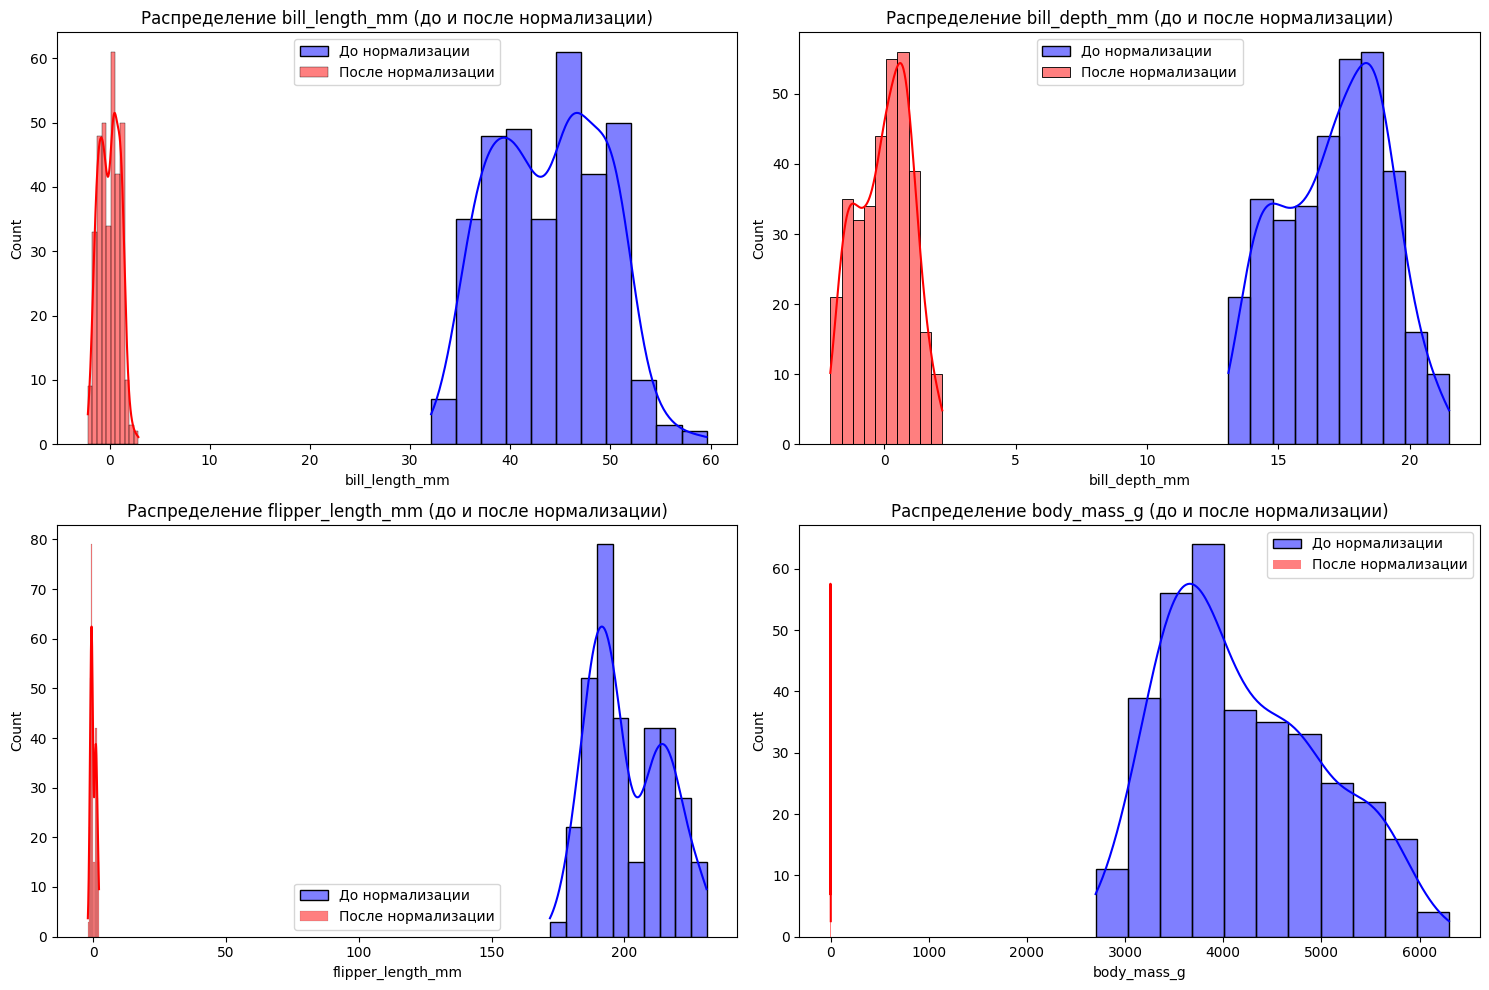

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(nums_columns, 1):
    plt.subplot(2, 2, i)

    sns.histplot(filled_data[column], kde=True, color="blue", label="До нормализации", alpha=0.5)

    sns.histplot(standart_data[column], kde=True, color="red", label="После нормализации", alpha=0.5)

    plt.title(f'Распределение {column} (до и после нормализации)')
    plt.legend()

plt.tight_layout()
plt.show()

До нормализации
- Все признаки распределены в своих исходных масштабах.

После нормализации (красный цвет)
- Все признаки приведены к одной шкале, близкой к стандартному распределению.
- Исходные различия в масштабе больше не наблюдаются.
- Форма распределений сохраняется, но данные теперь центрированы и стандартизированы.

Таким образом, нормализация успешно привела все числовые признаки к единой шкале.

# Выберите и примените наиболее подходящий способ кодирования для каждого категориального признака.

Для признаков species и island был выбран OneHotEncoder, так как они могут принимать 3 значения.

Для кодирования признака sex был выбран LabelEncoder, так как он может принимать только 2 значения.

# Примените метод главных компонент для уменьшения размерности.

Оставим только пол, предсказанный случайным лесом и закодируем пол обратно.

In [ ]:
pca_data = standart_data.drop(columns=['sex', 'sex_knn'])
pca_data.sex_rf = sex_encoder.fit_transform(pca_data.sex_rf)

In [ ]:
pca = PCA(n_components=2)
df_pca_features = pca.fit_transform(pca_data.select_dtypes(include=['float64', 'int64']))
df_pca = pd.DataFrame(df_pca_features, columns=['PCA_1', 'PCA_2'])

In [ ]:
pca_data['species'] = pca_data[['species_Adelie', 'species_Chinstrap', 'species_Gentoo']].idxmax(axis=1).str.replace('species_', '')

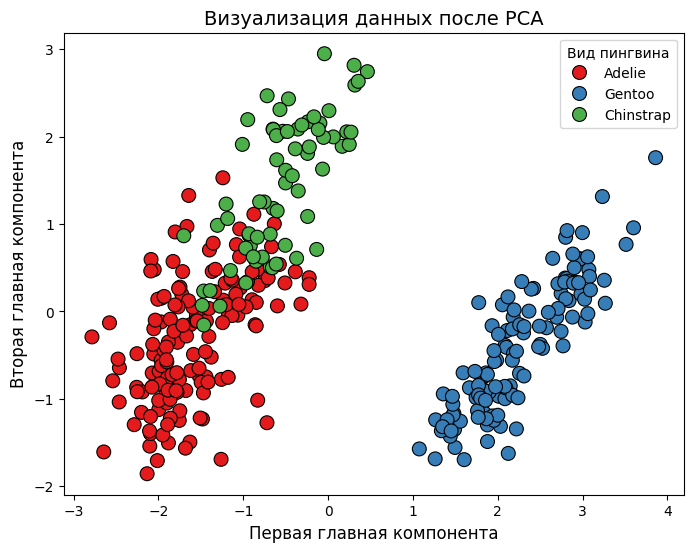

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PCA_1'], y=df_pca['PCA_2'], hue=pca_data['species'], palette='Set1', s=100, edgecolor='k')

plt.title('Визуализация данных после PCA', fontsize=14)
plt.xlabel('Первая главная компонента', fontsize=12)
plt.ylabel('Вторая главная компонента', fontsize=12)
plt.legend(title='Вид пингвина')